<a href="https://colab.research.google.com/github/RIR-Is-Everywhere/KNN_from_Scratch/blob/main/221902159_CSE412_222D3_LabReport03_mlpFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MLP from Scratch: XOR Task
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Dataset: XOR
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],
              [1],
              [1],
              [0]])


In [3]:
# Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(float)

In [4]:
# Initialize Parameters
def init_weights():
    np.random.seed(42)
    W1 = np.random.randn(2,2) * 0.1   # (input x hidden)
    b1 = np.zeros((1,2))
    W2 = np.random.randn(2,1) * 0.1   # (hidden x output)
    b2 = np.zeros((1,1))
    return W1, b1, W2, b2

In [5]:
# Forward Pass
def forward(X, W1, b1, W2, b2, activation="sigmoid"):
    z1 = X @ W1 + b1
    if activation == "sigmoid":
        a1 = sigmoid(z1)
    else:
        a1 = relu(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)  # output layer always sigmoid
    return z1, a1, z2, a2

In [6]:
# Backward Pass
def backward(X, y, z1, a1, z2, a2, W2, activation="sigmoid"):
    m = len(y)
    dz2 = a2 - y
    dW2 = (a1.T @ dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    if activation == "sigmoid":
        dz1 = (dz2 @ W2.T) * sigmoid_deriv(z1)
    else:
        dz1 = (dz2 @ W2.T) * relu_deriv(z1)

    dW1 = (X.T @ dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2

In [7]:
# Training Function
def train(X, y, lr=0.1, iterations=1000, activation="sigmoid"):
    W1, b1, W2, b2 = init_weights()
    losses = []

    for i in range(iterations):
        # Forward
        z1, a1, z2, a2 = forward(X, W1, b1, W2, b2, activation)

        # Loss (MSE)
        loss = np.mean((y - a2)**2)
        losses.append(loss)

        # Backward
        dW1, db1, dW2, db2 = backward(X, y, z1, a1, z2, a2, W2, activation)

        # Update
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

        if i % (iterations//5) == 0:
            print(f"Iteration {i}, Loss: {loss:.4f}")

    return W1, b1, W2, b2, losses

In [8]:
# Evaluation Metrics
def predict(X, W1, b1, W2, b2, activation="sigmoid"):
    _, _, _, a2 = forward(X, W1, b1, W2, b2, activation)
    return (a2 >= 0.5).astype(int), a2

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true==1) & (y_pred==1))
    fp = np.sum((y_true==0) & (y_pred==1))
    return tp / (tp+fp+1e-8)

def recall(y_true, y_pred):
    tp = np.sum((y_true==1) & (y_pred==1))
    fn = np.sum((y_true==1) & (y_pred==0))
    return tp / (tp+fn+1e-8)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r + 1e-8)

def roc_curve(y_true, y_prob):
    thresholds = np.linspace(0,1,50)
    tpr, fpr = [], []
    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        tp = np.sum((y_true==1) & (y_pred==1))
        fn = np.sum((y_true==1) & (y_pred==0))
        fp = np.sum((y_true==0) & (y_pred==1))
        tn = np.sum((y_true==0) & (y_pred==0))
        tpr.append(tp/(tp+fn+1e-8))
        fpr.append(fp/(fp+tn+1e-8))
    return fpr, tpr

Iteration 0, Loss: 0.2500
Iteration 1000, Loss: 0.2500
Iteration 2000, Loss: 0.2500
Iteration 3000, Loss: 0.2500
Iteration 4000, Loss: 0.2500


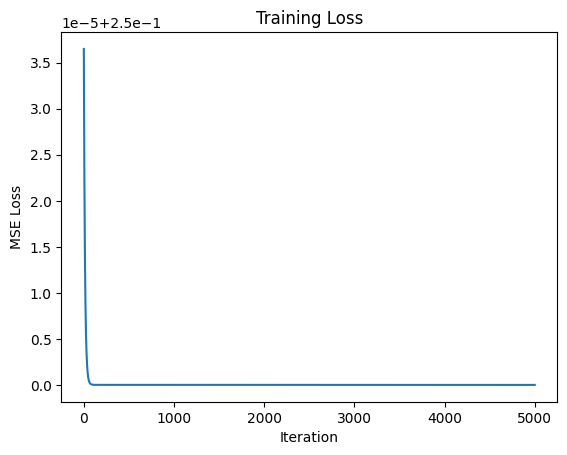

In [9]:
# Run Experiment
W1, b1, W2, b2, losses = train(X, y, lr=0.1, iterations=5000, activation="sigmoid")

# Plot Loss
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.show()

In [10]:
# Predictions
y_pred, y_prob = predict(X, W1, b1, W2, b2, activation="sigmoid")

print("Accuracy:", accuracy(y, y_pred))
print("Precision:", precision(y, y_pred))
print("Recall:", recall(y, y_pred))
print("F1-score:", f1_score(y, y_pred))

Accuracy: 0.5
Precision: 0.4999999975
Recall: 0.4999999975
F1-score: 0.4999999925000001


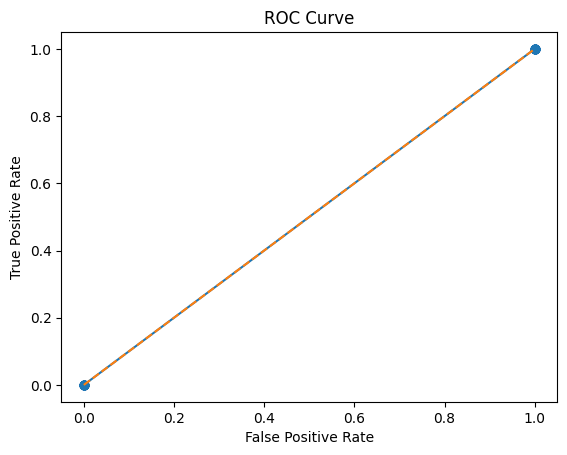

In [11]:
# ROC Curve
fpr, tpr = roc_curve(y, y_prob)
plt.plot(fpr, tpr, marker='o')
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()